🎥 Recommended Video : [Apriori Algorithm](https://www.youtube.com/watch?v=WGlMlS_Yydk)

🎥 Recommended Video : [Eclat Algorithm](https://www.youtube.com/watch?v=oBiq8cMkTCU)

# Association Rule Learning: Discovering Patterns with Apriori

Suppose you walk into a supermarket, wondering why chips and salsa are always placed side by side. Retailers often use **Association Rule Learning** to uncover patterns in customer purchases, such as "customers who buy chips are likely to buy salsa." These insights help design better layouts, targeted promotions, and recommendation systems.

---

## What is Association Rule Learning?

**Association Rule Learning** is a rule-based machine learning method used to discover meaningful relationships between variables in large datasets. It’s most famously applied in **market basket analysis** to identify relationships between products purchased together.

### Key Concepts:

- **Itemset**: A collection of items (e.g., `{Milk, Bread}`).
- **Support**: The proportion of transactions containing a particular itemset.
- **Confidence**: The likelihood that item Y is bought when item X is bought.
- **Lift**: The ratio of observed support to expected support if X and Y were independent. A lift greater than 1 indicates a positive association.

---

## The Apriori Algorithm

The **Apriori algorithm** identifies frequent itemsets and generates association rules. Its core principle is simple: if an itemset is frequent, all its subsets must also be frequent. This reduces computational complexity by eliminating unlikely combinations early.

### Steps:

1. **Set a Minimum Support Threshold**
   - Define a threshold for the minimum frequency of an itemset in the dataset.

2. **Generate Frequent Itemsets**
   - Begin with single items that meet the support threshold.
   - Combine items to form larger itemsets, keeping only those that meet the support threshold.

3. **Generate Association Rules**
   - From the frequent itemsets, create rules that meet a specified confidence threshold.

---

## Example: Understanding Apriori in Action

Consider a dataset of transactions:
- **Transaction 1**: `{Milk, Bread}`
- **Transaction 2**: `{Milk, Diaper}`
- **Transaction 3**: `{Milk, Bread, Diaper}`
- **Transaction 4**: `{Bread, Diaper}`

### Step 1: Set Minimum Support Threshold
- Let’s set the **minimum support** to 50% (appears in at least 2 transactions).

### Step 2: Find Frequent Itemsets
- **Single Items**:
  - Milk: 3/4 transactions (75%)
  - Bread: 3/4 transactions (75%)
  - Diaper: 3/4 transactions (75%)
- **Pairs**:
  - `{Milk, Bread}`: 2/4 transactions (50%)
  - `{Milk, Diaper}`: 2/4 transactions (50%)
  - `{Bread, Diaper}`: 2/4 transactions (50%)

### Step 3: Generate Rules
- **Rule 1**: Milk → Bread (Confidence = 2/3 = 66.67%)
- **Rule 2**: Bread → Milk (Confidence = 2/3 = 66.67%)
- **Rule 3**: Milk → Diaper (Confidence = 2/3 = 66.67%)

---

## Advantages of Apriori

- Simple to understand and implement.
- Works effectively with large datasets for rule discovery.

## Limitations of Apriori

- Computationally intensive for very large datasets.
- Requires careful selection of thresholds (support, confidence) to balance insights and performance.

---

## Applications of Apriori

- **Market Basket Analysis**: Uncover product associations to optimize store layouts.
- **Recommendation Systems**: Suggest related items to customers.
- **Fraud Detection**: Identify unusual patterns in transactions.

---

## Conclusion

The Apriori algorithm is a foundational technique in association rule learning, offering valuable insights into hidden relationships within data. By identifying frequent itemsets and generating rules, it empowers businesses to make data-driven decisions in diverse applications, from retail to recommendation systems.


🎥 Optional Video : [Association Rule Learning via Apriori and Eclat using Python to predict Shopping Behavior
](https://www.youtube.com/watch?v=OLe55z8NcbM)

## Example: Market Basket Analysis using Apriori Algorithm
This project demonstrates the application of the Apriori algorithm to perform market basket analysis on a retail dataset. The goal is to identify frequent itemsets and generate association rules that can inform marketing strategies and improve customer experience.

## Importing the libraries

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=9c2bc187da5a5edce7d42d151b87338760df2f1d2633eec4eb2e5f444cb4d090
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [ ]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1e7n-USc99o4bYmtsXzObBmjhK5ZyhYh0/view?usp=drive_link"
gdd = read_gd(url)

dataset = pd.read_csv(gdd)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [ ]:
dataset.head(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Prepare the transaction data for the Apriori algorithm.
# Iterate through each row (transaction) in the dataset.
# Extract the items purchased in each transaction and store them as a list.
# Append each transaction list to the 'transactions' list.
transactions = []
for i in range(0, dataset.shape[0]): # Use dataset.shape[0] to get the number of rows
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [ ]:
print(transactions[0])

['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


## Training the Apriori model on the dataset

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

### Putting the results well organised into a Pandas DataFrame

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [ ]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Displaying the results sorted by descending lifts

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


- **Support**:
  - **Definition**: The relative frequency of transactions containing a specific itemset (combination of items) in the dataset.
  - **Interpretation**: A higher support indicates the itemset is more common in the dataset.
  - **example** : Approximately 0.4533% of all transactions in the dataset include both "chicken" and "light cream." For example, if there are 10,000 transactions, about 45 transactions contain both items.

- **Confidence**:
  - **Definition**: The probability that a transaction containing the antecedent (items in the "if" part of the rule) also contains the consequent (items in the "then" part).
  - **Interpretation**: A higher confidence suggests a stronger likelihood that the consequent is purchased when the antecedent is purchased.
  - **example** : In transactions where "light cream" is bought, 29.06% of those transactions also include "chicken."

- **Lift**:
  - **Definition**: A measure of how much more often the antecedent and consequent occur together compared to if they were independent.
  - **Interpretation**:
    - Lift > 1: Positive association (items are more likely to be bought together).
    - Lift = 1: No association (items are bought independently).
    - Lift < 1: Negative association (items are less likely to be bought together).

  - **example** : A lift of 4.84 means that customers who buy "light cream" are 4.84 times more likely to buy "chicken" than customers who don’t buy "light cream."


# Association Rule Learning: Discovering Hidden Patterns with the Eclat Algorithm

## The Eclat Algorithm: A Depth-First Search Approach

**Eclat** (Equivalence Class Clustering and bottom-up Lattice Traversal) uses a **vertical data format** to efficiently mine frequent itemsets. Unlike the Apriori algorithm, which generates candidate sets iteratively, Eclat directly intersects transaction lists to identify frequent patterns.

### How It Works:

1. **Set a Minimum Support Threshold**
   - Define a minimum frequency for an itemset to qualify as significant.

2. **Transform Dataset into Vertical Format**
   - Each item is represented with a list of transaction IDs (TIDs) where it appears.

3. **Find Frequent Itemsets**
   - Start with single items.
   - Intersect transaction lists to discover larger itemsets that meet the support threshold.

---

## Example: Eclat in Action

Let’s explore Eclat using a simple transaction dataset:

- **Transaction 1**: `{Milk, Bread}`
- **Transaction 2**: `{Milk, Diaper}`
- **Transaction 3**: `{Milk, Bread, Diaper}`
- **Transaction 4**: `{Bread, Diaper}`

### Step 1: Set Minimum Support Threshold
- Assume a **minimum support** of 50% (an itemset must appear in at least 2 transactions).

### Step 2: Transform Dataset into Vertical Format
- Milk: `{1, 2, 3}`
- Bread: `{1, 3, 4}`
- Diaper: `{2, 3, 4}`

### Step 3: Find Frequent Itemsets
- **Single Items**:
  - Milk: 3/4 transactions (75%)
  - Bread: 3/4 transactions (75%)
  - Diaper: 3/4 transactions (75%)
- **Pairs**:
  - `{Milk, Bread}`: Intersection of `{1, 2, 3}` and `{1, 3, 4}` = `{1, 3}` → 2/4 transactions (50%)
  - `{Milk, Diaper}`: Intersection of `{1, 2, 3}` and `{2, 3, 4}` = `{2, 3}` → 2/4 transactions (50%)
  - `{Bread, Diaper}`: Intersection of `{1, 3, 4}` and `{2, 3, 4}` = `{3, 4}` → 2/4 transactions (50%)

---

## Why Use Eclat?

### Advantages:

- **Efficient for Dense Datasets**: Processes large datasets faster than Apriori by eliminating candidate generation.
- **Compact Memory Usage**: Leverages a vertical data format, storing only transaction IDs.

### Limitations:

- **Rule Generation Not Included**: Eclat identifies frequent itemsets but doesn’t directly generate association rules.
- **Threshold Tuning**: Setting an appropriate support threshold can be challenging.

---

## Practical Applications

- **Retail Analytics**: Identify frequently bought product combinations.
- **Fraud Detection**: Spot unusual patterns in transactions.
- **Recommendation Systems**: Suggest related items to users based on past behavior.

---

## Conclusion

The **Eclat Algorithm** is a powerful and efficient tool for frequent itemset mining, especially in dense datasets. By focusing on vertical data formats and leveraging transaction list intersections, it simplifies the process of uncovering valuable patterns. While it doesn’t generate rules directly, Eclat lays the foundation for actionable insights in retail, finance, and beyond.



## Example: Market Basket Analysis using Eclat Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from itertools import combinations

In [ ]:
# Loading data from Google Drive instead of local file
import requests
from io import StringIO

def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1e7n-USc99o4bYmtsXzObBmjhK5ZyhYh0/view?usp=drive_link"
gdd = read_gd(url)
dataset = pd.read_csv(gdd, header=None)
transactions = []
for i in range(0, dataset.shape[0]):
    transactions.append([str(dataset.values[i,j]) for j in range(0, dataset.shape[1])])

# Check the first few transactions
print(f"Total transactions: {len(transactions)}")
print("Sample of first 3 transactions:")
for i in range(3):
    print(transactions[i])

Total transactions: 7501
Sample of first 3 transactions:
['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']
['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


## **The Eclat Algorithm**

The Eclat algorithm uses a depth-first search approach. It takes a list of transactions as input, and it outputs frequent itemsets along with their support values. The min_support parameter controls the frequency threshold for itemsets to be considered frequent.



In [ ]:
class Eclat:
    def __init__(self, min_support=0.5):
        self.min_support = min_support
        self.item_sets = None
        self.frequent_itemsets = []

    def fit(self, transactions):
        """
        Fit the Eclat model to transactions data

        Parameters:
        -----------
        transactions : list of lists
            List of transactions where each transaction is a list of items
        """
        # Calculate the minimum support count
        self.min_support_count = len(transactions) * self.min_support

        # Create item-tidset dictionary (vertical representation)
        self.tidsets = defaultdict(set)
        for tid, transaction in enumerate(transactions):
            for item in transaction:
                if item != 'nan':  # Skip nan values
                    self.tidsets[item].add(tid)

        # Filter items that meet minimum support
        self.tidsets = {k: v for k, v in self.tidsets.items()
                         if len(v) >= self.min_support_count}

        # Find frequent itemsets using depth-first search
        self._dfs_mining([], list(self.tidsets.keys()))

        # Calculate support values
        total_transactions = len(transactions)
        for itemset, tidset in self.frequent_itemsets:
            support = len(tidset) / total_transactions
            yield (list(itemset), support)

    def _dfs_mining(self, prefix, items):
        """Depth-first search to find frequent itemsets"""
        for i, item_i in enumerate(items):
            # Create new itemset by adding item_i to prefix
            new_itemset = tuple(sorted(prefix + [item_i]))
            tidset_i = self.tidsets[item_i] if not prefix else self._get_tidset(new_itemset)

            # If the support is enough, add to frequent itemsets
            if len(tidset_i) >= self.min_support_count:
                self.frequent_itemsets.append((new_itemset, tidset_i))

                # Create new items list for recursion
                new_items = items[i+1:]
                if new_items:
                    self._dfs_mining(list(new_itemset), new_items)

    def _get_tidset(self, itemset):
        """Get the tidset for an itemset by intersecting its items' tidsets"""
        tidsets = [self.tidsets[item] for item in itemset if item in self.tidsets]
        if not tidsets:
            return set()
        intersection = set.intersection(*tidsets)
        return intersection

In [ ]:
# Define minimum support
min_support = 0.003

# Initialize and run Eclat
eclat = Eclat(min_support=min_support)
results = list(eclat.fit(transactions)) # Training

# Print a few results to check
print(f"Total frequent itemsets found: {len(results)}")
print("\nSample of first 5 frequent itemsets:")
for i in range(min(5, len(results))):
    print(f"Itemset: {results[i][0]}, Support: {results[i][1]:.4f}")

Total frequent itemsets found: 1443

Sample of first 5 frequent itemsets:
Itemset: ['shrimp'], Support: 0.0715
Itemset: ['avocado', 'shrimp'], Support: 0.0031
Itemset: ['shrimp', 'tomato juice'], Support: 0.0036
Itemset: ['low fat yogurt', 'shrimp'], Support: 0.0063
Itemset: ['green tea', 'shrimp'], Support: 0.0115


In [ ]:
# Filter for pairs (itemsets of length 2)
pairs = [(itemset, support) for itemset, support in results if len(itemset) == 2]

# Create a DataFrame
df_results = pd.DataFrame([
    {
        'Product 1': itemset[0],
        'Product 2': itemset[1],
        'Support': support
    } for itemset, support in pairs
])

# Display shape of results
print(f"Total number of product pairs found: {df_results.shape[0]}")

# Display top 10 frequent itemsets by support
print("\nTop 10 most frequent product pairs:")
top_results = df_results.nlargest(n=10, columns='Support')
print(top_results)

Total number of product pairs found: 786

Top 10 most frequent product pairs:
             Product 1      Product 2   Support
244      mineral water      spaghetti  0.059725
248          chocolate  mineral water  0.052660
234               eggs  mineral water  0.050927
236               milk  mineral water  0.047994
266        ground beef  mineral water  0.040928
616          chocolate      spaghetti  0.039195
633        ground beef      spaghetti  0.039195
411               eggs      spaghetti  0.036528
407               eggs   french fries  0.036395
243  frozen vegetables  mineral water  0.035729


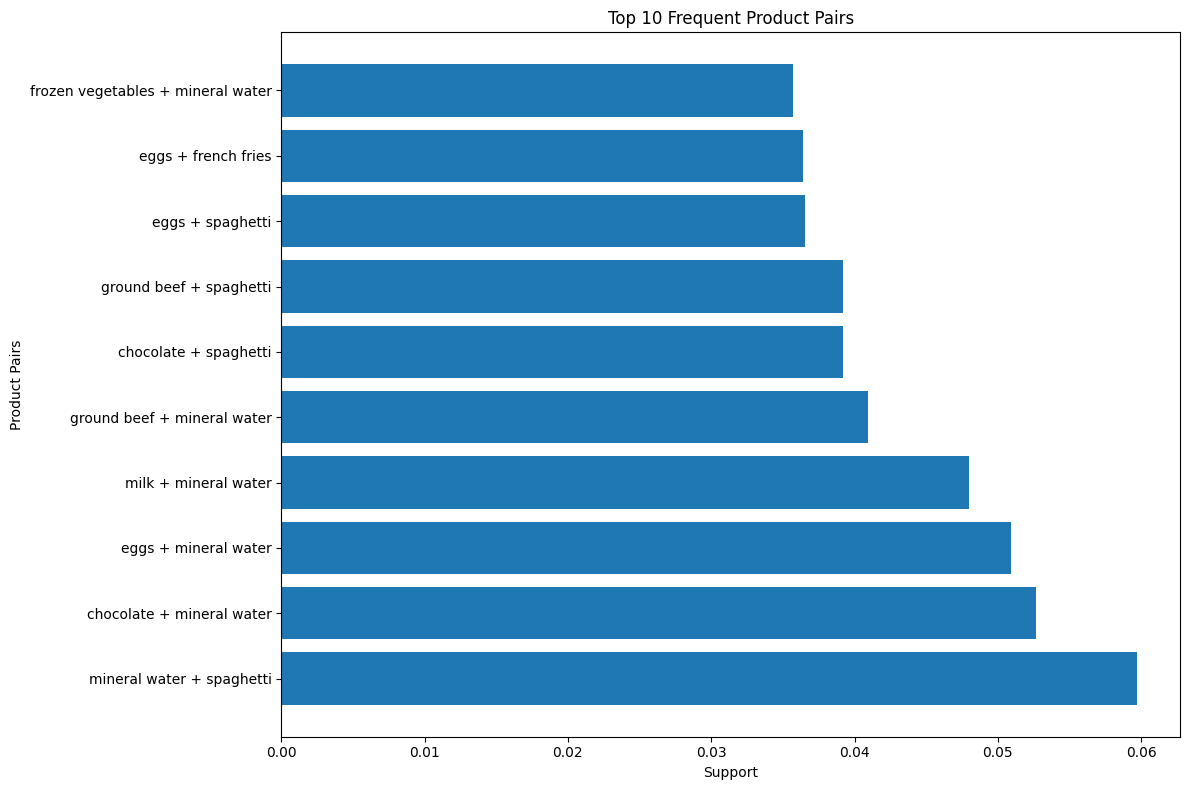

In [ ]:
# Visualize the top results
plt.figure(figsize=(12, 8))
plt.barh(top_results['Product 1'] + ' + ' + top_results['Product 2'],
         top_results['Support'])
plt.xlabel('Support')
plt.ylabel('Product Pairs')
plt.title('Top 10 Frequent Product Pairs')
plt.tight_layout()
plt.show()